<a href="https://colab.research.google.com/github/ealsk/Undergrad-DeepLearning-20Fall/blob/master/01_linear_regression_using_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**라이브러리 import 하기**

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data(given)**

In [4]:
x_train = [2, 4, 6, 8, 10]
y_train = [5, 4, 3, 2, 1]
signal_length = len(x_train)
y_noise = np.random.normal(0,1,signal_length)

y_train = y_train + y_noise

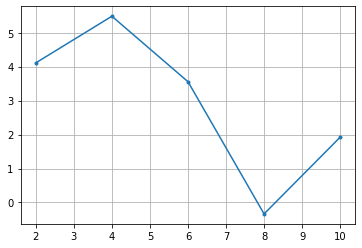

In [5]:
plt.plot(x_train, y_train, '.-')
plt.grid()

**initalization**

In [6]:
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='wbias')

w0 = 9.0;
b0 = 4.0;

w = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='baias')

In [7]:
hyporthesis = x_train * w + b

In [8]:
loss = tf.reduce_mean(tf.square(hyporthesis - y_train))

**Optimizer**

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [10]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [11]:
sess.run(tf.global_variables_initializer())

In [19]:
nb_epoch = 2001
vloss = []
vb = []
vw = []

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 200 == 0: 
        w1 = sess.run(w)[0] 
        b1 = sess.run(b)[0]
        print(step, sess.run(loss), w1, b1)

0 1.9188702 -0.5097412 6.0056415
200 1.9188702 -0.5097412 6.0056415
400 1.9188702 -0.5097412 6.0056415
600 1.9188702 -0.5097412 6.0056415
800 1.9188702 -0.5097412 6.0056415
1000 1.9188702 -0.5097412 6.0056415
1200 1.9188702 -0.5097412 6.0056415
1400 1.9188702 -0.5097412 6.0056415
1600 1.9188702 -0.5097412 6.0056415
1800 1.9188702 -0.5097412 6.0056415
2000 1.9188702 -0.5097412 6.0056415


**학습완료**

In [20]:
w1 = sess.run(w)[0]
b1 = sess.run(b)[0]


**출력해보기**

In [21]:
print(w1, b1)

-0.5097412 6.0056415


In [22]:
strl = 'y =' + str(w1) + 'x +' + str(b1)
print(strl)

y =-0.5097412x +6.0056415


Text(0.5, 1.0, 'y =-0.5097412x +6.0056415')

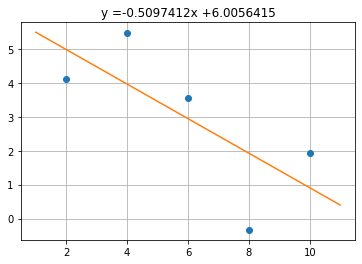

In [23]:
plt.figure(figsize=(6,4))
plt.plot(x_train, y_train, 'o')

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid()
plt.title(strl)